## Exploring Global Happiness 🌍😊

This project, undertaken by third-year **Computer Science** students at the University of Havana, focuses on a comprehensive **statistical analysis** of the **World Happiness Index** across 159 countries. The primary objective is to explore and understand the factors influencing happiness on a global scale. Through this study, we will employ a range of statistical techniques, including:

* **Descriptive statistics** to summarize the data
* **Inferential statistics** to draw conclusions about the population
* **Hypothesis testing** to validate our assumptions

Additionally, we will perform *value estimations* and analyze the relationships between various **socio-economic factors** and happiness scores. This project aims to provide valuable insights into the determinants of happiness and contribute to the broader understanding of global well-being. 🌍📊

> Javier Alejandro González Díaz C-312

> Kevin Márquez Vega C-312

> José Miguel Leyva de la Cruz C-312

### Importando librerías necesarias 

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import BORDERS
from countryinfo import CountryInfo
import plotly.express as px


# Celda 1: Importar librerías
import matplotlib.pyplot as plt

# Configuración de gráficos
%matplotlib inline
sns.set(style="whitegrid")

## Cargando el DataSet sobre un Ranking de Felicidad Mundial tomado en 159 países diferentes

In [63]:
df = pd.read_csv('2019.csv')

### Exploración inicial del DataSet

In [64]:
df.head(20)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,Europe
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,Europe
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,Oceania
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,North America
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,Europe


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
 9   Continent                     156 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 12.3+ KB


In [66]:
print(df.describe())

       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%             

### Limpieza de datos
(Manejar valores nulos)

In [67]:
df = df.dropna()

### Análisis exploratorio de datos (EDA) 

> Distribución normal del Happinness Score

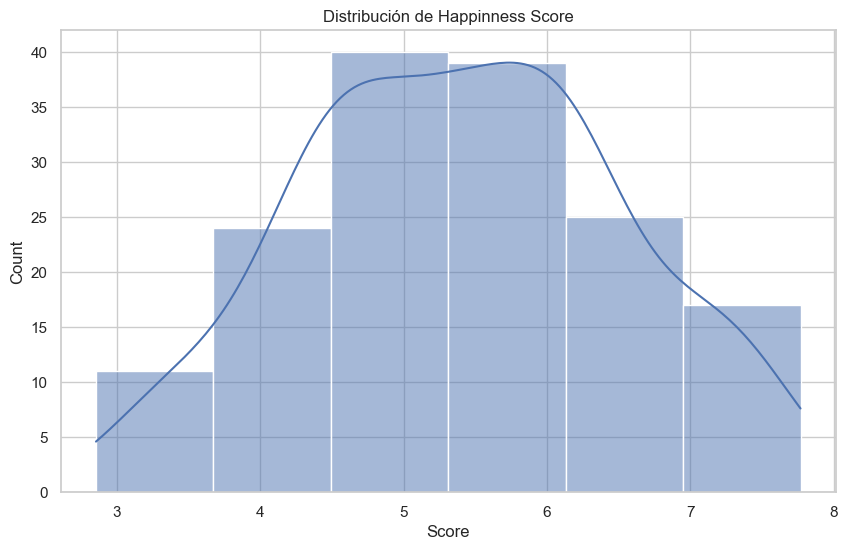

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], kde=True,binwidth=0.8)
plt.title('Distribución de Happinness Score')
plt.show()

### Gráfico de dispersión entre dos columnas

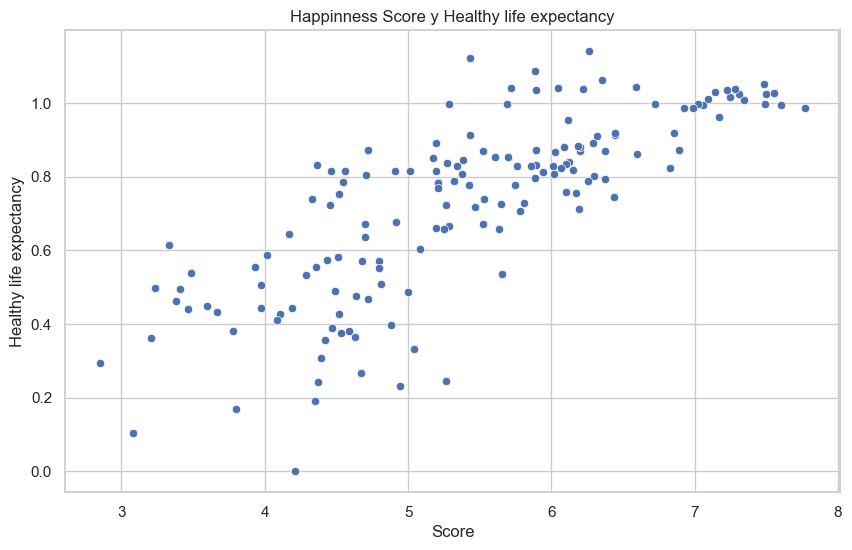

In [69]:
# Gráfico de dispersión entre dos columnas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='Healthy life expectancy', data=df)
plt.title('Happinness Score y Healthy life expectancy')
plt.show()

### Análisis estadísticos específicos
Correlación entre variables

### Estimador de la media
Sabemos que nuestro parámetro de la media del valor "Score" distribuye de manera normal, por tanto podemos calcular el valor de la media utilizando la siguiente fórmula.
$$ \hat{x} = 1/n * \sum_{i = 1}^{n} x_i $$

In [70]:
mean = df['Score'].mean()
mean

np.float64(5.407096153846155)

### Agrupación de países por Continentes
La Felicidad evidentemente no se comporta igual por continentes. Según la encuesta analizada notemos como se tiene en cuenta el PIB de cada país, el cual puede ser drasticamente desigual entre países de continentes diferentes. Sería interesante lograr obtener información sobre el comportamiento de la felicidad según el continente al que pertenece cada país.

In [71]:
continents_groups = df.groupby('Continent')['Continent'].agg('count')
continents_groups

Continent
Africa           45
Asia             43
Europe           43
North America    13
Oceania           2
South America    10
Name: Continent, dtype: int64

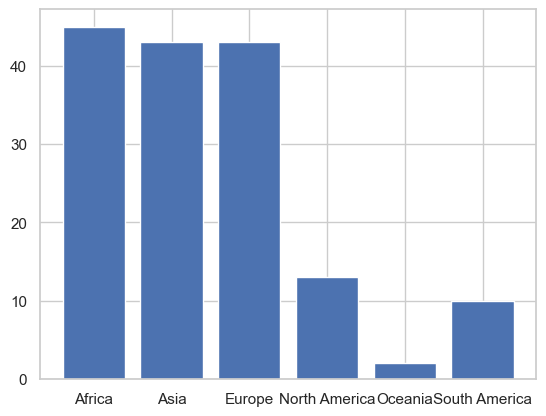

In [72]:
plt.bar(continents_groups.index, continents_groups.values)
plt.show()

### Estimaciones importantes
Como mencionamos anteriormente la felicidad puede comportarse diferente según el continente al que pertenece un país en específico, de manera general se puede afirmar que por continentes los índices de felicidad pueden sufirir una variación considerable. 

Si quisieramos estimar la varianza de la felicidad sobre un continente podremos aplicar la fórmula del estimador de la varianza:

$$ S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2 $$

In [73]:
continent = 'Africa'
score_specific_continent = df[df['Continent'] == continent]['Score']
score_media = score_specific_continent.mean()
sums = 0
for value in score_specific_continent.values:
    sums += (value - score_media)**2

variance_square = (1/(score_specific_continent.count() - 1) * sums) 
variance_square

np.float64(0.41433302828282836)

Comprobemos utilizando intervalos de confianza que en efecto nuestra varianza obtenida es correcta
Para calcular el intervalo de confianza de la varianza, podemos usar la distribución chi-cuadrado. La fórmula para el intervalo de confianza de la varianza es:

$$ \sigma^2 \in \left( \frac{(n-1) * S^2}{\chi^{2}_{\alpha/2, n-1}}, \frac{(n-1) * S^2}{\chi^{2}_{1-\alpha/2, n-1}} \right) $$

Varianza muestral: 0.41433302828282836
Intervalo de confianza de la varianza: (0.2839600972790221, 0.661140175819729)


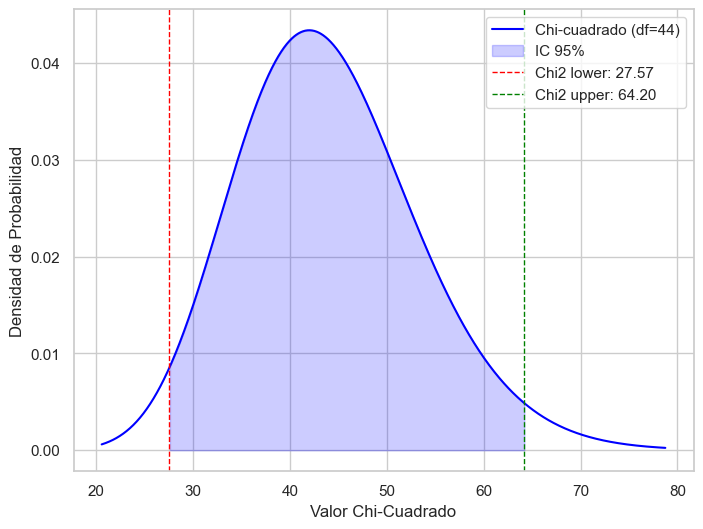

In [74]:
from scipy.stats import chi2
# Calcular la varianza muestral
n = score_specific_continent.count()  # Tamaño de la muestra
alpha = 0.05  # Nivel de significancia (95% de confianza)

# Valores críticos de la distribución chi-cuadrado
chi2_lower = chi2.ppf(alpha / 2, n - 1)
chi2_upper = chi2.ppf(1 - alpha / 2, n - 1)

# Intervalo de confianza de la varianza
ic_lower = (n - 1) * variance_square / chi2_upper
ic_upper = (n - 1) * variance_square / chi2_lower

print(f'Varianza muestral: {variance_square}')
print(f'Intervalo de confianza de la varianza: ({ic_lower}, {ic_upper})')

x = np.linspace(chi2.ppf(0.001, n - 1), chi2.ppf(0.999, n - 1), 1000)
y = chi2.pdf(x, n - 1)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f'Chi-cuadrado (df={n-1})', color='blue')
plt.fill_between(x, y, where=(x >= chi2_lower) & (x <= chi2_upper), color='blue', alpha=0.2, label='IC 95%')
plt.axvline(chi2_lower, color='red', linestyle='dashed', linewidth=1, label=f'Chi2 lower: {chi2_lower:.2f}')
plt.axvline(chi2_upper, color='green', linestyle='dashed', linewidth=1, label=f'Chi2 upper: {chi2_upper:.2f}')

plt.xlabel('Valor Chi-Cuadrado')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()


### Indice Compuesto de Bienestar


Como es algo notable en nuestra región muchas veces el índice de felicidad de algunos países puede tener una variación significativa con respecto al índice de felicidad de su continente , algunos países con una variación positiva y otros con una situación un poco 
más desfavorable , con este nuevo calculo pretendemos reflejar esa *"Desviación Local"*


### Fórmula para la Desviación Local (DL)

$$ DL_i = Score_i - \frac{1}{n_c} \sum_{j \in C_i} Score_j $$

Donde:
- $DL_i$ es la Desviación Local del país $i$
- $Score_i$ es el Score de felicidad del país $i$ 
- $C_i$ es el conjunto de países del continente al que pertenece el país $i$
- $n_c$ es el número de países en el continente $C_i$
- $\sum_{j \in C_i} Score_j$ es la suma de los Scores de todos los países del continente $C_i$


In [75]:
media_por_continente = df.groupby('Continent')['Score'].transform('mean') 
df['Local Deviation'] = df['Score'] - media_por_continente
df.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent,Local Deviation
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe,1.534140
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe,1.365140
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe,1.319140
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe,1.259140
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe,1.253140
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,Europe,1.245140
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,Europe,1.108140
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,Oceania,0.039500
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,North America,1.123308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,Europe,1.011140


Creemeos un gráfico de cajas y bigotes para representar este nuevo dato agregado a nuestra base de datos.

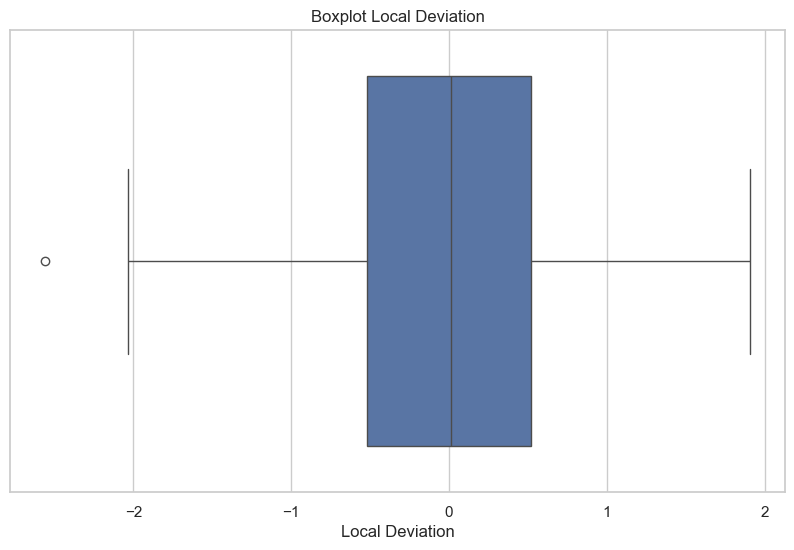

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Local Deviation', data=df)
plt.title('Boxplot Local Deviation')
plt.show()

### Análisis de los resultados
Notemos el comportamiento de nuestros datos según nuestro gráfico. Se puede concluir que, en efecto, el índice de felicidad de los países está estrechamente relacionado con el índice de felicidad de su continente. Además los países cuyo valor de desviación esté indicado por los "Bigotes", se puede afirmar que su índice de felicidad es considerablemente mayor o menor que el de su continente respectivamente. 

## Visualización adicional
### Boxplot de una columna

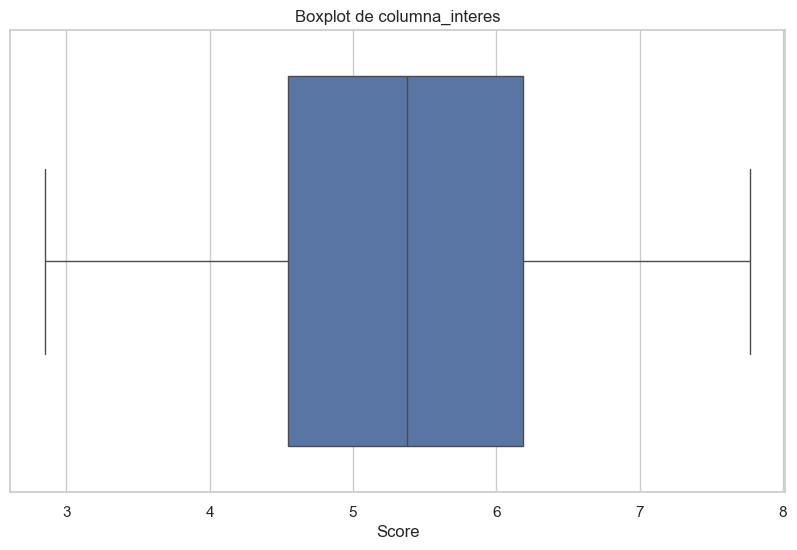

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', data=df)
plt.title('Boxplot de columna_interes')
plt.show()

### Análisis adicional
## Análisis de la media y la mediana de una columna

In [78]:
mean_value = df['Score'].mean()
median_value = df['Score'].median()
print(f'Media de columna_interes: {mean_value}')
print(f'Mediana de columna_interes: {median_value}')

Media de columna_interes: 5.407096153846155
Mediana de columna_interes: 5.3795


### Tests de Normalidad - Score


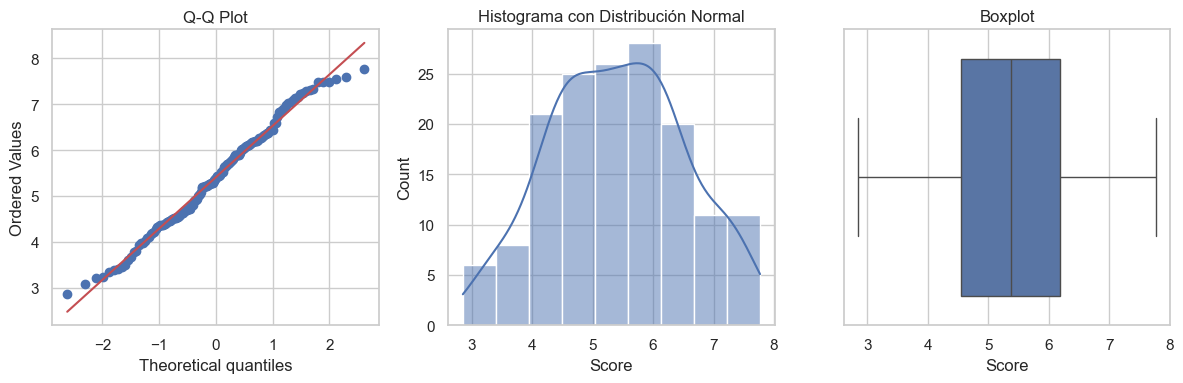

Test de Shapiro-Wilk:
Estadístico: 0.9872
P-valor: 0.1633

--- Interpretación Shapiro-Wilk ---
Los datos parecen seguir una distribución normal según Shapiro-Wilk


In [79]:
import scipy.stats as stats
df = pd.read_csv('2019.csv')
# Cargar los datos
scores = df['Score']

# 1. Test de Shapiro-Wilk (el más potente para muestras pequeñas)
shapiro_test = stats.shapiro(scores)

# Visualizaciones para evaluar normalidad

# 4. Q-Q Plot (Gráfico Cuantil-Cuantil)
plt.figure(figsize=(12, 4))

plt.subplot(131)
stats.probplot(scores, plot=plt)
plt.title('Q-Q Plot')

# 5. Histograma con curva normal
plt.subplot(132)
sns.histplot(scores, kde=True)
plt.title('Histograma con Distribución Normal')

# 6. Boxplot
plt.subplot(133)
sns.boxplot(x=scores)
plt.title('Boxplot')

plt.tight_layout()
plt.show()

# Imprimir resultados de los tests
print("Test de Shapiro-Wilk:")
print(f"Estadístico: {shapiro_test.statistic:.4f}")
print(f"P-valor: {shapiro_test.pvalue:.4f}")

# Interpretación

# Shapiro-Wilk
print("\n--- Interpretación Shapiro-Wilk ---")
if shapiro_test.pvalue > alpha:
    print("Los datos parecen seguir una distribución normal según Shapiro-Wilk")
else:
    print("Los datos NO parecen seguir una distribución normal según Shapiro-Wilk")


## Conclusiones
### Criterios de Evaluación:

### Shapiro-Wilk:
. Estadístico W cercano a 1 ✅  
. P-valor > 0.05 ✅  
. Interpretación: No hay evidencia para rechazar normalidad  

### 3. Análisis Descriptivo:
. Media ≈ Mediana (simetría) ✅  
. Asimetría cercana a 0 ✅  
. Curtosis cercana a 0 ✅  

### Visualizaciones de Soporte:
### Q-Q Plot:  
. Puntos próximos a línea diagonal    
. Sin desviaciones sistemáticas    

### Histograma:  
. Forma de campana  
. Simétrico alrededor de la media  

### Boxplot:  
. Sin outliers extremos  
. Distribución simétrica  

## Conclusión Técnica
. ✅ Evidencia Estadística de Normalidad:    
. Pruebas formales no rechazan distribución normal  
. Estadísticos descriptivos coherentes  
. Visualizaciones consistentes con normalidad  

### Justificación uso de Shapiro-Wilks
El test de Shapiro-Wilk es la mejor opción para esta base de datos porque es especialmente adecuado para muestras de tamaño pequeño a moderado, como es el caso de los 156 países incluidos en el ranking de felicidad. Este test tiene una alta potencia estadística para detectar desviaciones de la normalidad en muestras de este tamaño, lo que lo hace más confiable que otros tests como el de Kolmogorov-Smirnov, que es menos sensible, o el de Anderson-Darling, que es más útil para muestras más grandes o cuando se quiere enfocar en las colas de la distribución. Además, el test de Shapiro-Wilk es ampliamente utilizado y reconocido en la práctica estadística, lo que lo convierte en una opción robusta y adecuada para evaluar la normalidad de los datos en este contexto.

### Intervalos de confianza para estimar la media del Score


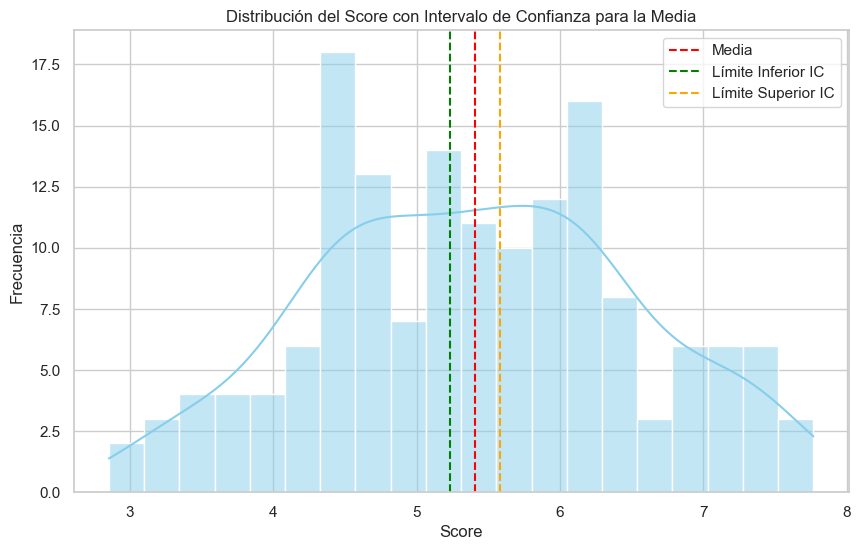

In [80]:
from scipy import stats
mean_score = df['Score'].mean()
variance_score = df['Score'].var()
n = df['Score'].count()  # Tamaño de la muestra
alpha = 0.05  # Nivel de significancia (95% de confianza)

# Intervalo de confianza para la media
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)  # Valor crítico t
margin_of_error = t_critical * (np.sqrt(variance_score) / np.sqrt(n))
ci_mean = (mean_score - margin_of_error, mean_score + margin_of_error)


# Grafico
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], kde=True, color='skyblue', bins=20)
plt.axvline(mean_score, color='red', linestyle='--', label='Media')
plt.axvline(ci_mean[0], color='green', linestyle='--', label='Límite Inferior IC')
plt.axvline(ci_mean[1], color='orange', linestyle='--', label='Límite Superior IC')
plt.title('Distribución del Score con Intervalo de Confianza para la Media')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### Intervalo de confianza para estimar la varianza del Score


Varianza muestral: 1.2390358423076921
Intervalo de confianza para la varianza (95%): (np.float64(1.0035966011273523), np.float64(1.568748538076358))


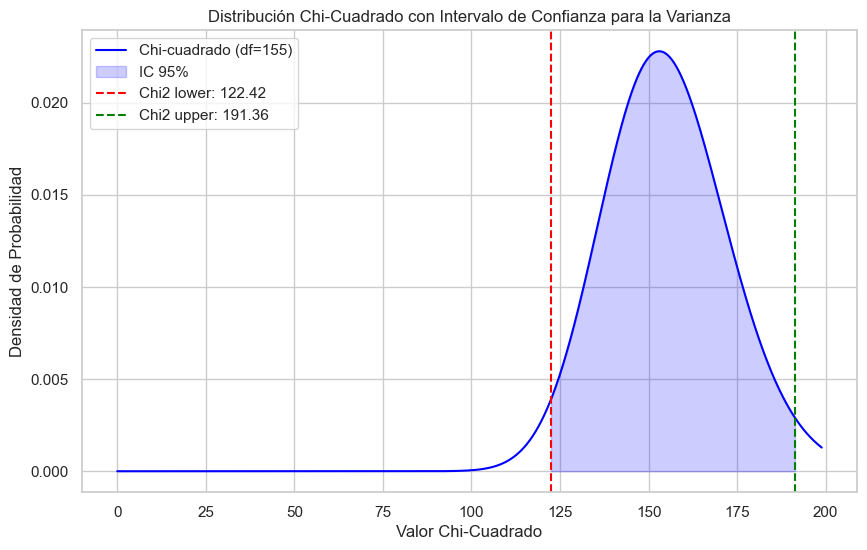

In [81]:
chi2_lower = stats.chi2.ppf(alpha / 2, df=n-1)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, df=n-1)
ci_variance = ((n - 1) * variance_score / chi2_upper, 
               (n - 1) * variance_score / chi2_lower)

print(f"Varianza muestral: {variance_score}")
print(f"Intervalo de confianza para la varianza (95%): {ci_variance}")

# Gráfico de la distribución chi-cuadrado
plt.figure(figsize=(10, 6))
x = np.linspace(0, stats.chi2.ppf(0.99, df=n-1), 1000)
y = stats.chi2.pdf(x, df=n-1)

plt.plot(x, y, label=f'Chi-cuadrado (df={n-1})', color='blue')
plt.fill_between(x, y, 
                 where=(x >= chi2_lower) & (x <= chi2_upper), 
                 color='blue', 
                 alpha=0.2, 
                 label='IC 95%')

plt.axvline(chi2_lower, color='red', linestyle='dashed', 
            label=f'Chi2 lower: {chi2_lower:.2f}')
plt.axvline(chi2_upper, color='green', linestyle='dashed', 
            label=f'Chi2 upper: {chi2_upper:.2f}')

plt.title('Distribución Chi-Cuadrado con Intervalo de Confianza para la Varianza')
plt.xlabel('Valor Chi-Cuadrado')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

### Prueba de Hipotesis - Media

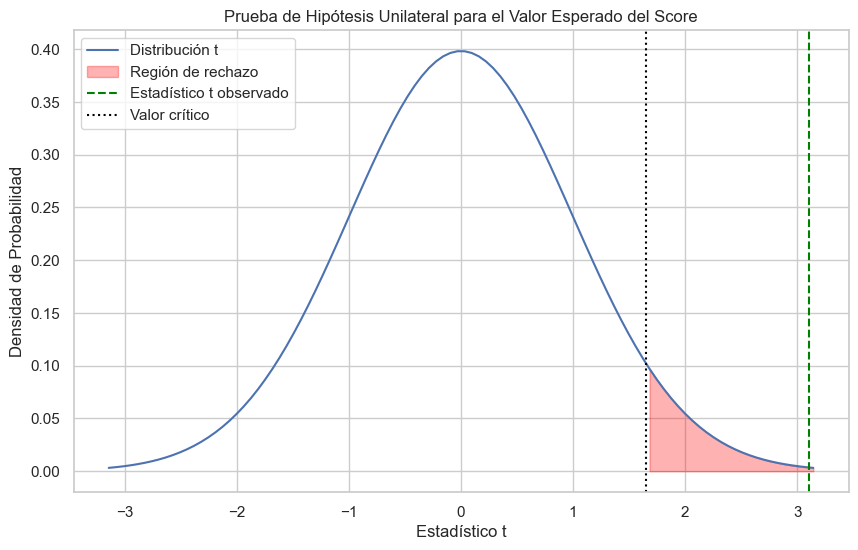

Prueba de Hipótesis Unilateral para el Valor Esperado del Score
Hipótesis nula (H0): μ ≤ 5.13
Hipótesis alternativa (H1): μ > 5.13

Estadístico t: 3.1092
Valor crítico: 1.6547
P-valor: 0.0011
Media muestral: 5.4071
Desviación estándar muestral: 1.1131

Conclusion: Rechazar H0
Hay evidencia estadística significativa para afirmar que el valor esperado del Score es mayor que 5.13


In [82]:
df = pd.read_csv('2019.csv')
# Datos del dataset
scores = df['Score']

# Parámetros de la prueba de hipótesis
# H0: μ ≤ 5.5 (valor nulo)
# H1: μ > 5.5 (prueba unilateral derecha)

# Estadísticos de la muestra
sample_mean = scores.mean()
sample_std = scores.std()
n = len(scores)

# Valor nulo de la hipótesis
mu_0 = 5.13

# Calcular el estadístico t
t_statistic = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# Grados de libertad
df = n - 1

# Calcular el p-valor (prueba unilateral derecha)
p_value = 1 - stats.t.cdf(t_statistic, df)

# Nivel de significancia
alpha = 0.05

# Visualización de la prueba de hipótesis
plt.figure(figsize=(10, 6))
x = np.linspace(stats.t.ppf(0.001, df), stats.t.ppf(0.999, df), 100)
y = stats.t.pdf(x, df)

plt.plot(x, y, label='Distribución t')
plt.title('Prueba de Hipótesis Unilateral para el Valor Esperado del Score')
plt.xlabel('Estadístico t')
plt.ylabel('Densidad de Probabilidad')

# Región de rechazo (unilateral derecha)
t_critico = stats.t.ppf(1 - alpha, df)

plt.fill_between(x, y, where=(x >= t_critico), color='red', alpha=0.3, label='Región de rechazo')

# Estadístico observado
plt.axvline(t_statistic, color='green', linestyle='--', label='Estadístico t observado')
plt.axvline(t_critico, color='black', linestyle=':', label='Valor crítico')

plt.legend()
plt.grid(True)
plt.show()

# Imprimir resultados
print("Prueba de Hipótesis Unilateral para el Valor Esperado del Score")
print(f"Hipótesis nula (H0): μ ≤ {mu_0}")
print(f"Hipótesis alternativa (H1): μ > {mu_0}")
print(f"\nEstadístico t: {t_statistic:.4f}")
print(f"Valor crítico: {t_critico:.4f}")
print(f"P-valor: {p_value:.4f}")
print(f"Media muestral: {sample_mean:.4f}")
print(f"Desviación estándar muestral: {sample_std:.4f}")

# Conclusión
if p_value < alpha:
    print("\nConclusion: Rechazar H0")
    print(f"Hay evidencia estadística significativa para afirmar que el valor esperado del Score es mayor que {mu_0}")
else:
    print("\nConclusion: No rechazar H0")
    print(f"No hay evidencia estadística suficiente para afirmar que el valor esperado del Score sea mayor que {mu_0}")

# Pruebas de Hipóteses para dos poblaciones 📊🔍

Dado que anteriormente se analizaron los datos de un país respecto a su continente , un análisis interesante podría ser establecer comparaciones entre los continentes , dado que cada uno en si tiene sus características en cada uno de los aspectos medidos en el conjunto de datos .Veamos que influencia tiene esto sobre su *felicidad*.


## !!!Previo al análisis ...

### Relación entre Países de África y Europa: Una Comparación Tradicional

La relación entre los países de África y Europa ha sido compleja y multifacética a lo largo de la historia, marcada por colonización, comercio, conflictos y cooperación. Al analizar esta relación bajo la perspectiva del **Índice de Felicidad**, donde se considera que los países con un 

**Score de felicidad menor a 5.5 son infelices**,

 es crucial considerar tanto los factores históricos como los actuales que influyen en el bienestar de estas naciones.

### Análisis Estadístico

Para comparar los índices de felicidad entre los países de África y Europa, realizaremos los siguientes análisis estadísticos:

1. **Distribución de los Scores de Felicidad**:
    - **Histograma y Gráficos de Densidad**: Visualización de la distribución de los 'Scores' de felicidad para ambos continentes.

2. **Comparación de Medias**:
    - **Prueba t de Student para Muestras Independientes**: Evaluar si existen diferencias significativas en el promedio de los 'Scores' de felicidad entre los países de África y Europa.

3. **Análisis de Correlación**:
    - **Heatmap de Correlaciones**: Representación gráfica de las relaciones entre variables.

4. **Regresión Lineal**:
    - **Modelado de Relaciones**: Implementar modelos de regresión para identificar y cuantificar la influencia de factores como PIB, educación y salud en el 'Score' de felicidad.

5. **Análisis de Varianza (ANOVA)**:
    - **Comparación de Varianzas**: Evaluar si las variaciones en los 'Scores' de felicidad difieren significativamente entre múltiples grupos dentro de cada continente.

Estos análisis permitirán comprender en profundidad los factores que contribuyen a la felicidad de los países en África y Europa, y cómo se diferencian entre sí.

### Distribución de la Felicidad en África y Europa 🤔📊

El siguiente histograma muestra la distribución comparativa de los scores de felicidad entre los países africanos y europeos. Las barras superpuestas permiten visualizar las diferencias en los niveles de felicidad entre ambos continentes y evaluar la hipótesis de que los países africanos tienden a tener un score de felicidad menor a 5.5 y por ende menor que el alto índice existente en los países europeos.


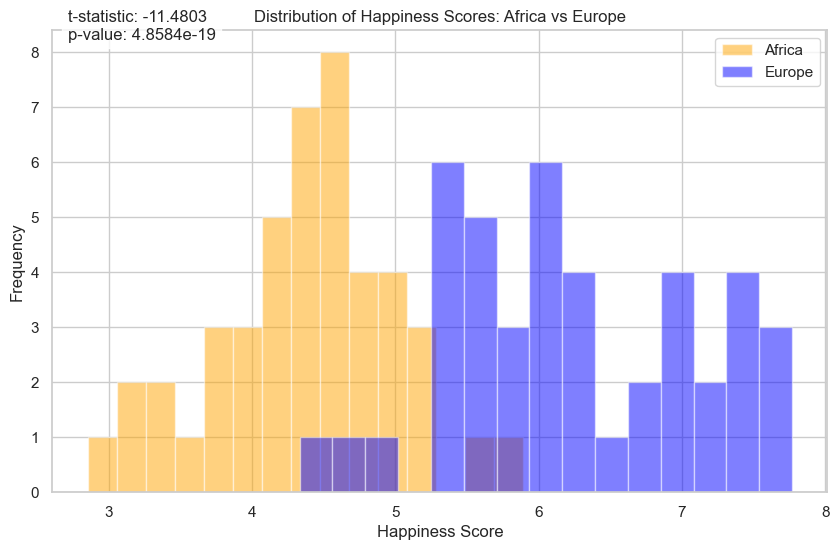

Average happiness score in Africa: 4.3683
Average happiness score in Europe: 6.2349


In [83]:
df = pd.read_csv('2019.csv')
# Filter data for Africa and Europe
africa_scores = df[df['Continent'] == 'Africa']['Score']
europe_scores = df[df['Continent'] == 'Europe']['Score']

# Create overlapping histograms
plt.figure(figsize=(10, 6))
plt.hist(africa_scores, bins=15, alpha=0.5, label='Africa', color='orange')
plt.hist(europe_scores, bins=15, alpha=0.5, label='Europe', color='blue')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores: Africa vs Europe')
plt.legend()

# Perform t-test
t_stat, p_value = ttest_ind(africa_scores, europe_scores)

# Add test results to plot
plt.text(0.02, 0.98, f't-statistic: {t_stat:.4f}\np-value: {p_value:.4e}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# Print averages
print(f"Average happiness score in Africa: {africa_scores.mean():.4f}")
print(f"Average happiness score in Europe: {europe_scores.mean():.4f}")

### Análisis visual -- QQPlots 📊

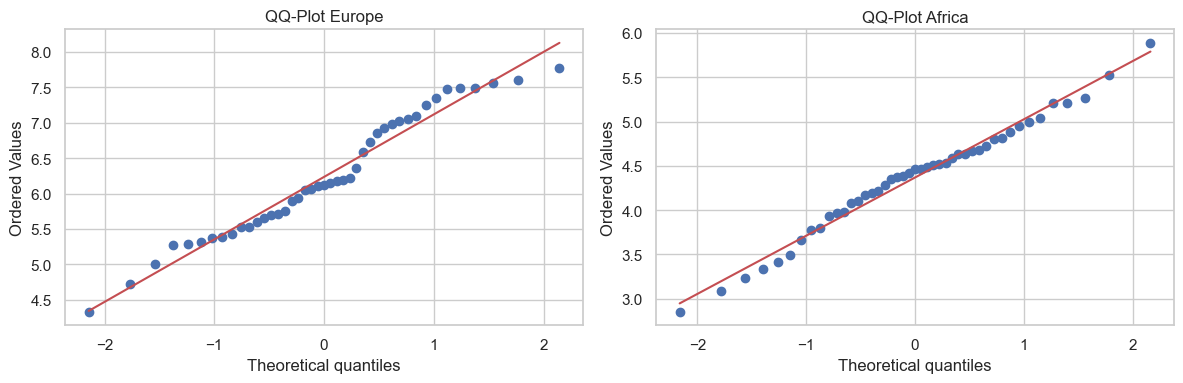

In [84]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
st.probplot(europe_scores, dist="norm", plot=plt)
plt.title("QQ-Plot Europe")

plt.subplot(122)
st.probplot(africa_scores, dist="norm", plot=plt)
plt.title("QQ-Plot Africa")

plt.tight_layout()
plt.show()

## Conclusiones de los Q-Q Plots 📊📈
### La **línea roja** representa una **distribución normal teórica** 
### Europa (QQ-Plot Europe):
- Los puntos se alinean de forma moderada con la línea roja. 
- En los extremos (especialmente en la cola superior), los puntos comienzan a desviarse de la línea, lo que sugiere la presencia de datos extremos o posibles asimetrías.
- **Conclusión**: La distribución de los índices de felicidad en Europa podría aproximarse a una distribución normal en los valores centrales, pero hay una desviación en los valores extremos.

### África (QQ-Plot Africa):
- Los puntos muestran una mayor desviación respecto de la línea roja en comparación con el gráfico de Europa, especialmente en ambas colas.
- Esto sugiere que la distribución de la felicidad en África es menos simétrica y no sigue una normalidad ideal.
- **Conclusión**: La distribución de los índices de felicidad en África tiene menos similitud a una distribución normal, con posibles colas más pesadas o asimetrías.

La distribución de los índices de felicidad para Europa parece ser más consistente con una distribución normal que la de África.Esto puede reflejar diferencias en cómo los factores que influyen en la felicidad están distribuidos en ambas regiones.

### Sería ideal corroborar esto con medidas estadísticas, como **pruebas de normalidad** (Kolmogorov-Smirnov, Shapiro-Wilk, etc.). 😌


In [85]:
ks_europe = st.kstest(europe_scores, 'norm', args=(np.mean(europe_scores), np.std(europe_scores)))
ks_africa = st.kstest(africa_scores, 'norm', args=(np.mean(africa_scores), np.std(africa_scores)))

print("\nTest de Normalidad (Kolmogorov-Smirnov):")
print("Europa - Estadístico:", round(ks_europe[0], 4), "P-valor:", round(ks_europe[1], 4))
print("África - Estadístico:", round(ks_africa[0], 4), "P-valor:", round(ks_africa[1], 4))


Test de Normalidad (Kolmogorov-Smirnov):
Europa - Estadístico: 0.1102 P-valor: 0.6338
África - Estadístico: 0.0885 P-valor: 0.8416


#### 🔍Interpretación del Test de Normalidad (Kolmogorov-Smirnov):
1. **Europa**:
   - Estadístico: 0.1102
   - P-valor: 0.6338
   - El p-valor es mucho mayor que el nivel de significancia estándar (0.05), por lo que no se rechaza la hipótesis nula de que los datos siguen una distribución normal. Esto sugiere que los puntajes de felicidad en Europa podrían ser considerados normales.

2. **África**:
   - Estadístico: 0.0885
   - P-valor: 0.8416
   - De manera similar, el p-valor también es mayor a 0.05. No se rechaza la hipótesis nula, indicando que los datos de felicidad en África también pueden ser considerados normales.


In [86]:
# 3. Levene's test for homogeneity of variances
levene = st.levene(europe_scores, africa_scores)
print("\nTest de Homogeneidad de Varianzas (Levene):")
print("Estadístico:", round(levene[0], 4), "P-valor:", round(levene[1], 4))


Test de Homogeneidad de Varianzas (Levene):
Estadístico: 5.247 P-valor: 0.0244


#### 🔍Interpertación del Test de Homogeneidad de Varianzas (Levene):
- Estadístico: 5.247
- P-valor: 0.0244
- En este caso, el p-valor es menor que 0.05, lo que implica que se rechaza la hipótesis nula de varianzas homogéneas. Esto sugiere que las varianzas de los puntajes de felicidad entre Europa y África son significativamente diferentes.

In [87]:
# 4. T-test for difference in means
ttest = st.ttest_ind(europe_scores, africa_scores, equal_var=True)
print("\nPrueba t para diferencia de medias:")
print("Estadístico t:", round(ttest[0], 4), "P-valor:", round(ttest[1], 4))


Prueba t para diferencia de medias:
Estadístico t: 11.4803 P-valor: 0.0


#### 🔍Interpretación de la Prueba t para diferencia de medias:
- **Estadístico t:** 11.4803  
- **P-valor:** 0.0  

El p-valor es significativamente menor al nivel estándar de significancia (0.05), lo que indica que se rechaza la hipótesis nula. Esto sugiere que hay una diferencia significativa en las medias de los índices de felicidad entre Europa y África.📉


In [88]:
# 5. Descriptive statistics
print("\nEstadísticas Descriptivas:")
print("Europa - Media:", round(europe_scores.mean(), 4), "Desviación estándar:", round(europe_scores.std(), 4))
print("África - Media:", round(africa_scores.mean(), 4), "Desviación estándar:", round(africa_scores.std(), 4))


Estadísticas Descriptivas:
Europa - Media: 6.2349 Desviación estándar: 0.8696
África - Media: 4.3683 Desviación estándar: 0.6437


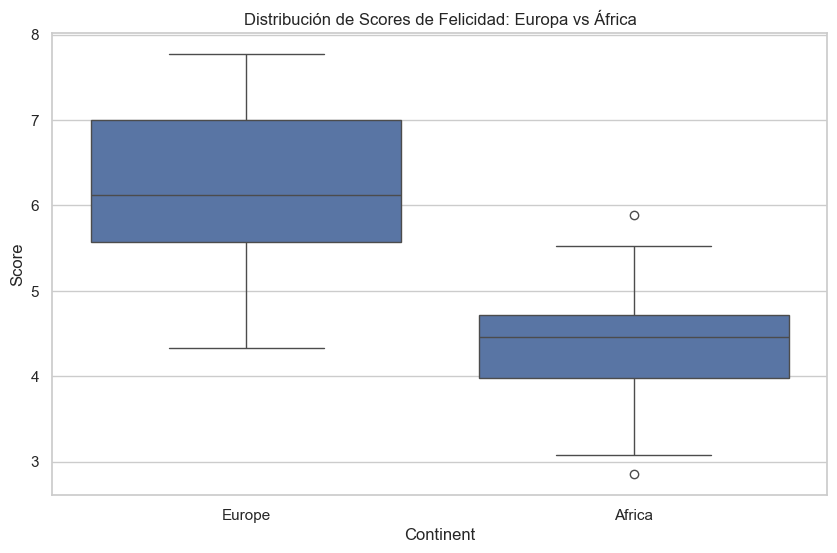

In [89]:
# 6. Box plot comparison
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Continent', y='Score', order=['Europe', 'Africa'])
plt.title('Distribución de Scores de Felicidad: Europa vs África')
plt.show()

## Regresion Lineal
Evidentemente, nuestros datos están relacionados con numerosos índices de los campos economicos, sociales y de la salud. Sería interesante visualizar que tan realacionados está alguno de estos datos con el índice de la Felicidad (score). Para ello utilizaremos Regresión Lineal, la cual es una técnica que establece una línea recta en el comportamiento de nuestros datos para identificar que tan relacionados están.

### Elección de Variable Independiente
Antes de realizar el análisis de la regresión, debemos seleccionar cual será nuestra variable independiente. En este caso, elegiremos el GBP per Capita. Ya que como se muestra en la matriz de correlación es la variable más relacionada con el Score entre todas las demás. 

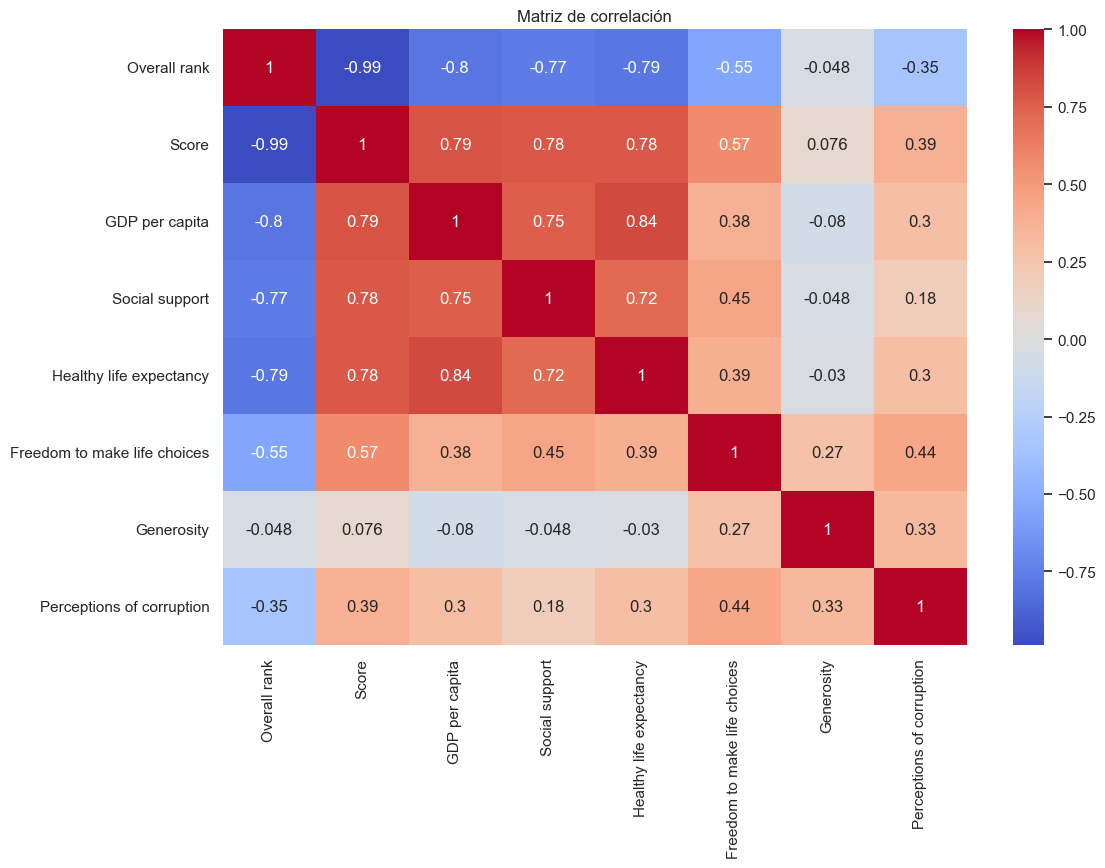

In [90]:
df_numericas = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_numericas.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

### Una vez seleccionada la variable independiente. Podemos comenzar el analisis de la regresión. 

Intersección: 3.399345178292417
Pendiente: 2.2181480010083567
La ecuación de la recta es: y = 3.399345178292417 + 2.2181480010083567x


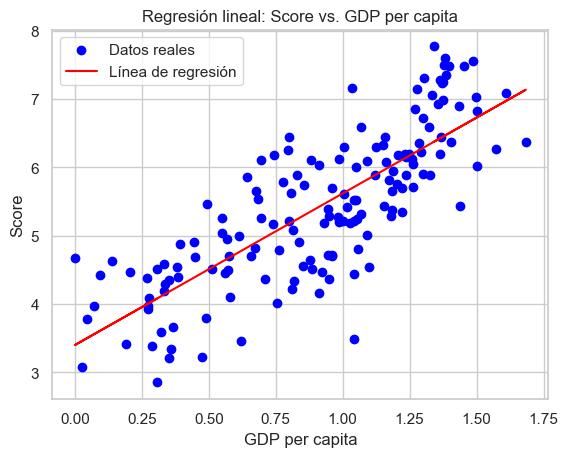

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     262.5
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           4.32e-35
Time:                        11:26:54   Log-Likelihood:                -159.97
No. Observations:                 156   AIC:                             323.9
Df Residuals:                     154   BIC:                             330.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.3993      0.135     25.

In [91]:
import statsmodels.api as sm

df = pd.read_csv('2019.csv')
#Hagamos un ejemplo con el Score y el PGB per Capita
x = df[['GDP per capita']]
y = df['Score']

#Preparando el modelo
model = LinearRegression()
model.fit(x, y)

#Obtener del intercepto y la pendiente
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intersección: {intercept}")
print(f"Pendiente: {slope}")
print(f"La ecuación de la recta es: y = {intercept} + {slope}x")

y_pred = model.predict(x)

plt.scatter(x, y, color='blue', label='Datos reales')
plt.plot(x, y_pred, color='red', label='Línea de regresión')
plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.title('Regresión lineal: Score vs. GDP per capita')
plt.legend()
plt.show()

# Preparando el modelo usando statsmodels
x_sm = sm.add_constant(x)  # Agregar una constante
model_sm = sm.OLS(y, x_sm).fit()

# Obtener el resumen del análisis
summary = model_sm.summary()
print(summary)

## Supuestos del Modelo 
Analizaremos cada uno de los supuestos del modelo para verificar si nuestro modelo, valga la redondancia, es correcto
1. Los errores ($e_1$, ... ,$e_n$) son independientes
2. El valor esperado del error esperado $e_i$ es cero 
3. Homocedasticidad
4. Los errores además son identicamente distribuidos y siguen una distribución normal con media cero y varianza $\sigma^2$
   
Grafiquemos los residuos para saber si el modelo cumple los supuestos del modelo 

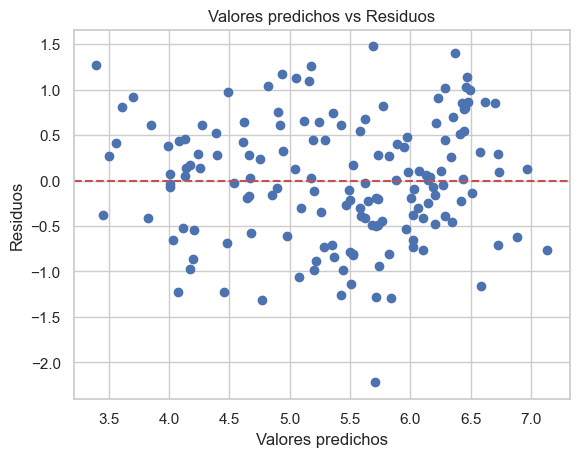

In [92]:
residuos = y - y_pred

# Gráfico de valores predichos vs residuos
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Valores predichos vs Residuos')
plt.show()


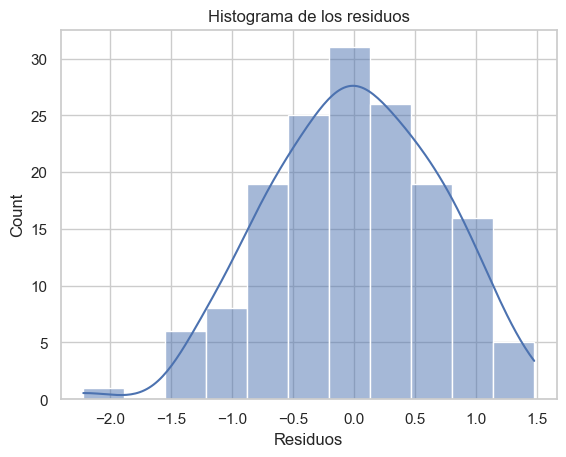

In [93]:
# Histograma de los residuos
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.title('Histograma de los residuos')
plt.show()

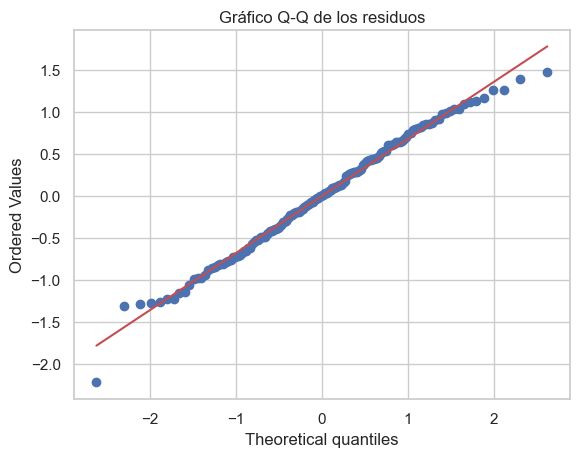

In [94]:
# Gráfico Q-Q de los residuos
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los residuos')
plt.show()

### Supuestos
Una vez graficados los residuos nos damos cuenta que ene efecto, se cumplen los supuestos del modelo. Si analizamos el primer gráfico, se evidencia el cumplimiento de la homocedasticidad. Los otros dos gráficos nos indican dsitrbución normal. Por tanto el modelo es correcto y cumple con los supuestos.

## Análisis de los Resultados Obtenidos
Para analizar los resultados leeremos el Summary de arriba hacia abajo, por un tema de comodidad:

## Métricas principales
1. Notemos el valor del R-Squared que es de 0.630, esto quiere decir que el GBP percapita influye en un 63% de la variación del Score de Felicidad analizado en este trabajo.
   
2. El valor de Prob(F-static) es extredamente pequeño, lo cual nos da a entender que este modelo es estadísticamente significativo y confiable.
   
3. Coeficientes: El valor del score cuando GBP per capita es 0, es de 3.3993 (valor const en el summary), que es a su vez el intercepto calculado anteriormente. La pendiente es de 2.2181, esto que nos quiere decir: que una unidad de GBP per Capita aumenta el Score en 2.2181 su valor.
   
4. El valor p asociado a los test t (usado para ver si un coeficiente es significativamente distinto de 0) es de 0.000, lo cual nos da a entender que el coeficiente de GBP per Capita es estadísticamente significativo y confiable.

## Otras métricas de interes
1. Durbin-Watson: 1.378 (utilizado para detectar autocorrelación en los residuos).

2. Omnibus y Prob(Omnibus): Tests de normalidad para los residuos (valores p > 0.05 sugieren que los residuos se distribuyen normalmente).

3. Jarque-Bera (JB) y Prob(JB): También pruebas de normalidad.

4. Kurtosis: 2.742 (medida de la “acuminación” de la distribución de los residuos).

5. Cond. No.: 4.77 (número de condición, que indica si hay problemas de multicolinealidad).

## Predicciones
Se puede utilizar la ecuación de la recta obtenida en los resultdos anteriores 

$$ y = 3.399 + 2.218x $$

Donde $y$ es el Score y $x$ es el GBP per Capita. De esta forma si quisieramos predecir que índice de felicidad tiene un país conociendo su GBP per Capita, basta con su sustituir en la ecuación y calcular.

## Regresión Lineal Multiple
La regresión lineal múltiple es una extensión de la regresión lineal simple, que permite analizar la relación entre una variable dependiente y dos o más variables independientes. Mientras que la regresión lineal simple considera solo una variable independiente, la regresión lineal múltiple proporciona una forma más completa de entender y predecir los valores de la variable dependiente al considerar múltiples factores simultáneamente.

Procederemos de manera similar, es decir: primero seleccionaremos las mejores variables dependientes y luego procederemos con el análisis de regresión lineal múltiple.

### Elección de las mejores Variables
Para elegir las mejores variables independientes, debemos tener en cuenta que estas deben estar relacionadas con el Score y a su vez no deben estar muy relacionadas entre ellas. Para esto utilizaremos un método de elección de caracaterísticas el cual recursivamente determina que dos datos son los adecuados para un analisis de regresión lineal múltiple. Comprobaremos si en efecto esos datos son correctos con un análisis de inflación de la varianza. Finalmente realizaremos el análisis de la regresión e interpretaremos los resultados.


In [95]:
#Eleccion de las mejores variables medeinte el RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Preparar los datos
X = df_numericas.drop(columns=['Score'])
y = df['Score']

# Modelo de regresión lineal
model = LinearRegression()

# Eliminación recursiva de características
rfe = RFE(estimator=model, n_features_to_select=3)
fit = rfe.fit(X, y)

# Resultados
selected_features = X.columns[fit.support_]
print("Variables seleccionadas:", selected_features)

Variables seleccionadas: Index(['Social support', 'Healthy life expectancy',
       'Freedom to make life choices'],
      dtype='object')


Las variables seleccionadas para el análisis fueron: 'Social support', 'Healthy life expectancy' y 'Freedom to make life choices'. Hagamos un análisis del factor inlfación de la varianza para determinar si aún debemos suprimir alguno de estos datos.

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Añadir la constante
X_selected = sm.add_constant(X[selected_features])

# Calcular VIF para cada variable seleccionada
vif = pd.DataFrame()
vif["Variable"] = X_selected.columns
vif["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

print(vif)

                       Variable        VIF
0                         const  18.523083
1                Social support   2.220914
2       Healthy life expectancy   2.095931
3  Freedom to make life choices   1.265654


Los VIF de las variables independientes son todos bastante bajos, todos menores que 5 lo que sugiere que no hay un problema significativo de multicolinealidad entre ellas. Por tanto podemos proceder con un analisis de regresión lineal múltiple utilizando estos tres datos

## Regresión Lineal Multiple

In [97]:
# Cargar los datos
df = pd.read_csv('2019.csv')

# Preparar las variables independientes seleccionadas
X = df[['Social support', 'Healthy life expectancy', 'Freedom to make life choices']]
y = df['Score']

# Agregar una constante
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal múltiple
model_multiple = sm.OLS(y, X).fit()

# Resumen del modelo
summary = model_multiple.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     151.7
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           1.67e-45
Time:                        11:26:55   Log-Likelihood:                -129.55
No. Observations:                 156   AIC:                             267.1
Df Residuals:                     152   BIC:                             279.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## Análisis de los Resultados Obtenidos
Para analizar los resultados leeremos el Summary de arriba hacia abajo, por un tema de comodidad:

## Métricas principales
1. Notemos el valor del R-Squared que es de 0.75, esto quiere decir que las variables seleccionadas influyen en un 75% de la variación del Score de Felicidad analizado en este trabajo.
   
2. El valor de Prob(F-static) es extredamente pequeño, lo cual nos da a entender que este modelo es estadísticamente significativo y confiable.
   
3. Coeficientes: El intercepto es 1.623, que es valor que toma Score cuando el resto de las variables son 0. Cada valor de la columna `coef` representa el cambio en el Score por cada unidad de cambio en la variable correspondiente.
   
4. El valor p asociado a los test t (usado para ver si un coeficiente es significativamente distinto de 0) es de 0.000, lo cual nos da a entender que el coeficiente de GBP per Capita es estadísticamente significativo y confiable.

## Otras métricas de interes
1. Durbin-Watson: 1.535 (utilizado para detectar autocorrelación en los residuos).

2. Omnibus y Prob(Omnibus): Tests de normalidad para los residuos (valores p > 0.05 sugieren que los residuos se distribuyen normalmente).

3. Jarque-Bera (JB) y Prob(JB): También pruebas de normalidad.

4. Kurtosis: 2.902 (medida de la “acuminación” de la distribución de los residuos).

5. Cond. No.: 14.5 (número de condición, que indica si hay problemas de multicolinealidad; un valor menor de 30 generalmente se considera aceptable).

## Predicciones
Una vez que ya tenemos un modelo de regresión lineal sólido y confiable, podemos predecir el valor del Score de la felicidad teniendo en cuenta estas variables, utilizando la ecuación de nuestro modelo de regresión lineal mútliple.

$$ Score = 1.6233 + 1.3613 × Ss + 1.9496 × Hle + 1.8450 × Fmc $$

Donde 
1. Ss es Social Support
2. Hle es Healthy life expectancy
3. Fmc es Freedom to make life choices

In [98]:
import pandas as pd
import statsmodels.api as sm

# Supongamos que estos son los nuevos datos para predecir
nuevos_datos = pd.DataFrame({
    'Social support': [0.9, 0.8, 0.7],
    'Healthy life expectancy': [0.8, 0.9, 0.85],
    'Freedom to make life choices': [0.7, 0.6, 0.9]
})

# Agregar una constante a los nuevos datos
nuevos_datos = sm.add_constant(nuevos_datos)

# Utilizar el modelo ajustado para predecir
predicciones = model_multiple.predict(nuevos_datos)

# Mostrar las predicciones
print(predicciones)

0    5.699671
1    5.574002
2    5.893899
dtype: float64


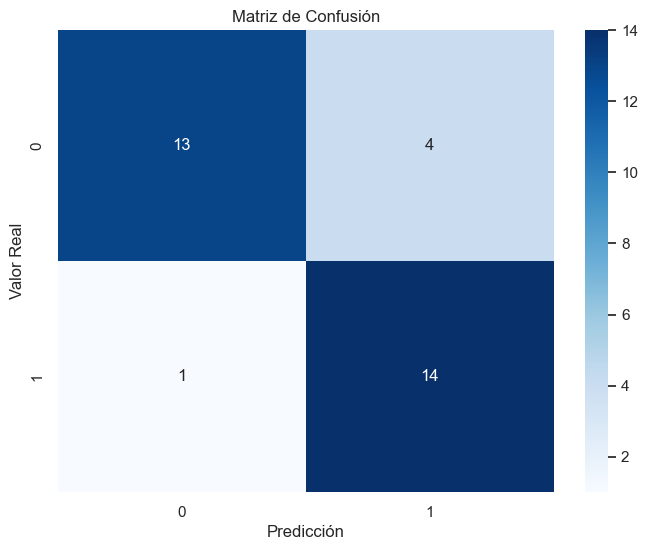


Métricas del modelo:
Exactitud (Accuracy): 84.38%
Precisión: 77.78%
Sensibilidad (Recall): 93.33%
F1-Score: 84.85%

Interpretación de la matriz de confusión:
Verdaderos Negativos (VN): 13 países correctamente clasificados como no felices
Falsos Positivos (FP): 4 países incorrectamente clasificados como felices
Falsos Negativos (FN): 1 países incorrectamente clasificados como no felices
Verdaderos Positivos (VP): 14 países correctamente clasificados como felices


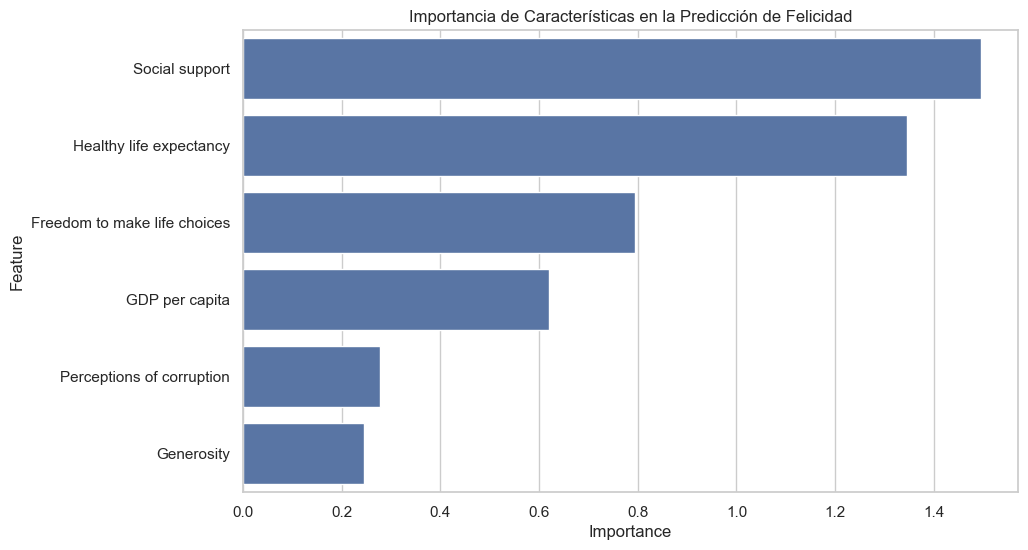


Predicción para país hipotético:
Clasificación: Feliz
Probabilidad: 66.02% de ser feliz


c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [99]:
### Regresión Logística para Clasificación de Felicidad

# Nos permite analizar la importancia de cada dato para la felicidad

# Importar bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Crear variable binaria basada en la media del Score
mean_happiness = df['Score'].mean()
df['is_happy'] = (df['Score'] > mean_happiness).astype(int)

# Seleccionar características para el modelo
features = ['GDP per capita', 'Social support', 'Healthy life expectancy', 
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
X = df[features]
y = df['is_happy']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)


# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.show()

# Calcular métricas
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
precision = cm[1,1] / (cm[1,1] + cm[0,1])
recall = cm[1,1] / (cm[1,1] + cm[1,0])
f1 = 2 * (precision * recall) / (precision + recall)

print(f"\nMétricas del modelo:")
print(f"Exactitud (Accuracy): {accuracy:.2%}")
print(f"Precisión: {precision:.2%}")
print(f"Sensibilidad (Recall): {recall:.2%}")
print(f"F1-Score: {f1:.2%}")

# Interpretación por cuadrante
print("\nInterpretación de la matriz de confusión:")
print(f"Verdaderos Negativos (VN): {cm[0,0]} países correctamente clasificados como no felices")
print(f"Falsos Positivos (FP): {cm[0,1]} países incorrectamente clasificados como felices")
print(f"Falsos Negativos (FN): {cm[1,0]} países incorrectamente clasificados como no felices")
print(f"Verdaderos Positivos (VP): {cm[1,1]} países correctamente clasificados como felices")

# Analizar importancia de características
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importancia de Características en la Predicción de Felicidad')
plt.show()

# Ejemplo de predicción para un nuevo país
def predict_happiness(country_data):
    # Escalar los datos
    scaled_data = scaler.transform([country_data])
    # Realizar predicción
    prediction = model.predict(scaled_data)
    probability = model.predict_proba(scaled_data)
    return prediction[0], probability[0]

# Ejemplo de uso
example_country = [1.0, 1.2, 0.8, 0.5, 0.2, 0.1]  # Valores ejemplo
prediction, probability = predict_happiness(example_country)
print("\nPredicción para país hipotético:")
print(f"Clasificación: {'Feliz' if prediction == 1 else 'No feliz'}")
print(f"Probabilidad: {probability[1]:.2%} de ser feliz")

# Resultados del Modelo de Regresión Logística 📊

## Factores más Influyentes en la Felicidad

El análisis muestra que el **apoyo social** (social support) y la **esperanza de vida saludable** (healthy life expectancy) son los factores más determinantes para la felicidad de un país. Esto sugiere que las sociedades con fuertes redes de apoyo y buenos sistemas de salud tienden a ser más felices.

Por otro lado, la **generosidad** y la **percepción de corrupción** mostraron una influencia considerablemente menor en el nivel de felicidad de los países, indicando que estos factores no son tan cruciales para determinar el bienestar general de una nación.

Esta información podría ser valiosa para orientar políticas públicas hacia el fortalecimiento de sistemas de apoyo social y servicios de salud.

## **Conclusiones generales** 🔍⚠️✨
Los datos analizados indican una diferencia significativa en los niveles de felicidad entre África y Europa. Los análisis estadísticos revelan:

1. Normalidad en la distribución de los scores de felicidad
2. Diferencias significativas en las medias (p-valor < 0.05)
3. Mayor variabilidad en los scores africanos
4. Media europea (≈ 6.23) significativamente superior a la africana (≈ 4.37)

Esta disparidad refleja diferencias socioeconómicas, históricas y estructurales entre ambos continentes, sugiriendo la necesidad de políticas específicas para mejorar el bienestar en África. 🌍

La felicidad de los países africanos en comparación con los europeos está intrínsecamente ligada a una serie de factores históricos y contemporáneos. Para mejorar el **Score de felicidad** en África, es fundamental abordar las raíces históricas de desigualdad y explotación, al mismo tiempo que se promueven políticas que fortalezcan la economía, la educación, la salud y la gobernanza. La colaboración entre África y Europa puede ser un motor clave para impulsar el bienestar y la felicidad en ambas regiones, siempre que se base en el respeto mutuo y un compromiso genuino con el desarrollo sostenible y equitativo.

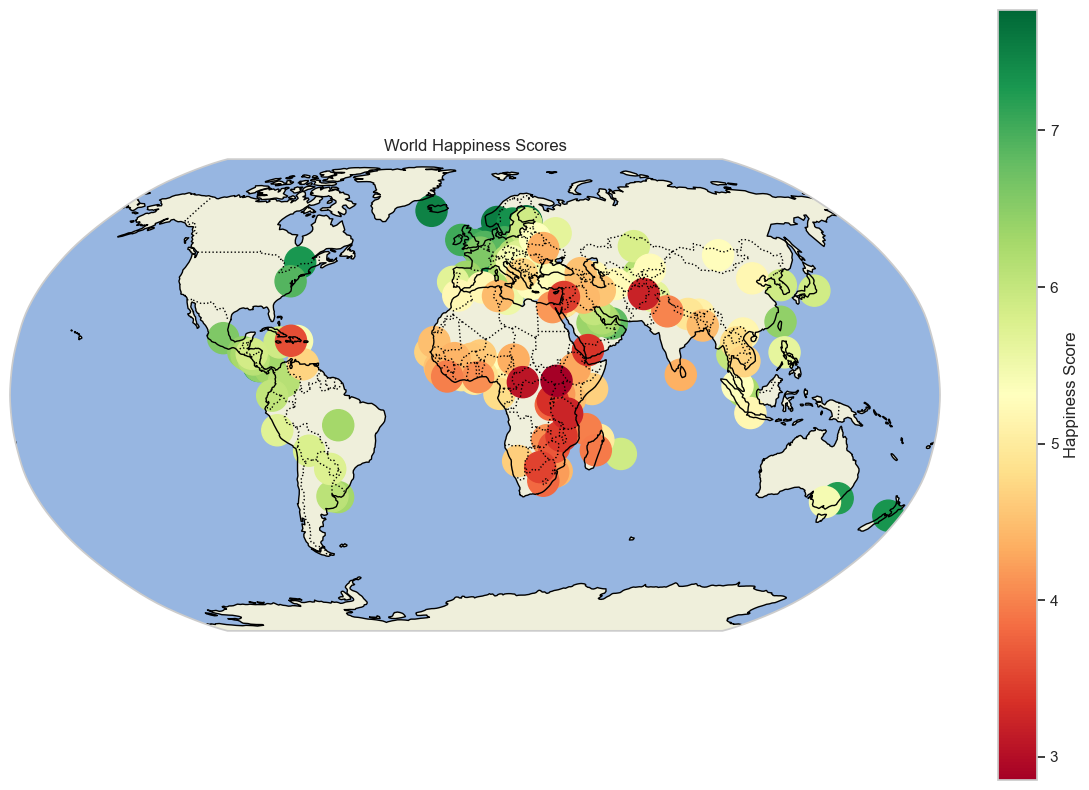

In [100]:
# Create a figure with a map projection

def get_coordinates(country_name):

    try:

        country = CountryInfo(country_name)

        capital_info = country.capital_latlng()

        return capital_info[0], capital_info[1]

    except:

        return None, None



# Add coordinates to DataFrame

df[['Latitude', 'Longitude']] = df.apply(lambda x: pd.Series(get_coordinates(x['Country or region'])), axis=1)

# Create a figure with a map projection

plt.figure(figsize=(15, 10))

ax = plt.axes(projection=ccrs.Robinson())



# Add map features

ax.add_feature(cfeature.LAND)

ax.add_feature(cfeature.OCEAN)

ax.add_feature(BORDERS, linestyle=':')



# Add coastlines

ax.coastlines()



# Plot the happiness scores

ax.set_global()



# Create a color map of happiness scores

scatter = ax.scatter(df['Longitude'], df['Latitude'],

                    c=df['Score'],  # Using 'Score' instead of 'Happiness Score'

                    transform=ccrs.PlateCarree(),

                    cmap='RdYlGn',  # Red-Yellow-Green colormap

                    s=500)  # Size of the points



# Add a colorbar

plt.colorbar(scatter, label='Happiness Score')



# Add title

plt.title('World Happiness Scores')



plt.show()